In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [2]:
load_dotenv()

True

In [3]:
llm = ChatGroq(model="llama-3.1-8b-instant")

In [4]:
# State for Jokes


class JokeState(TypedDict):
    topic: str
    joke: str
    explaination: str

In [5]:
# Generate the Joke on the Topic(Node)
def get_joke(state: JokeState):
    # get topic
    topic = state["topic"]

    # generate prompt
    prompt = f"Generate a Small Joke on Topic: {topic}"

    response = llm.invoke(prompt).content

    return {"joke": response}


# Generate Explaination of the Joke(Node)
def explain_joke(state: JokeState):
    # get joke
    joke = state["joke"]

    # generate prompt
    prompt = f"Understand and Explain the provided joke in simple words.\n{joke}"

    response = llm.invoke(prompt).content

    return {"explaination": response}

In [6]:
graph = StateGraph(JokeState)

In [7]:
# add nodes
graph.add_node("generate_joke", get_joke)
graph.add_node("explain_joke", explain_joke)

# Add Edges
graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "explain_joke")
graph.add_edge("explain_joke", END)

> Here we will make the checkpointer and during compiling pass the checkpointer which we are using


In [8]:
# Checkpointer
checkpoints = InMemorySaver()

# Pass the checkpointer to graph

workflow = graph.compile(checkpointer=checkpoints)

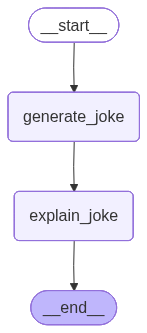

In [9]:
workflow

> During the time of Invoke pass the Unique Thread id.

The thread id is made using `configurable mapping of thread` which can be stored to some variable and pass during invoke


In [10]:
# This is how to define configurable mapping
config1 = {"configurable": {"thread_id": "1"}}

In [11]:
workflow.invoke({"topic": "Indian Economy"}, config=config1)

{'topic': 'Indian Economy',
 'joke': 'Why did the Indian rupee go to therapy?\n\nBecause it was feeling a little unstable and wanted to work on its growth rate.',
 'explaination': 'This joke is a play on words related to the Indian economy and the currency, the Indian rupee. Here\'s a breakdown:\n\n- The joke starts by asking why the Indian rupee (the currency) went to therapy.\n- The punchline explains that it went to therapy because it was feeling "unstable." In economics, an unstable currency means it\'s not stable in value, and its value fluctuates greatly.\n- The second part of the punchline says it wants to work on its "growth rate." This is a reference to economic growth, which is a measure of how quickly a country\'s economy is growing. It\'s a clever play on words because in economics, a growth rate is a numerical measure, but in a therapy context, growth rate could refer to personal growth and development.'}

In [12]:
# To get the states of that thread
workflow.get_state(config1)

StateSnapshot(values={'topic': 'Indian Economy', 'joke': 'Why did the Indian rupee go to therapy?\n\nBecause it was feeling a little unstable and wanted to work on its growth rate.', 'explaination': 'This joke is a play on words related to the Indian economy and the currency, the Indian rupee. Here\'s a breakdown:\n\n- The joke starts by asking why the Indian rupee (the currency) went to therapy.\n- The punchline explains that it went to therapy because it was feeling "unstable." In economics, an unstable currency means it\'s not stable in value, and its value fluctuates greatly.\n- The second part of the punchline says it wants to work on its "growth rate." This is a reference to economic growth, which is a measure of how quickly a country\'s economy is growing. It\'s a clever play on words because in economics, a growth rate is a numerical measure, but in a therapy context, growth rate could refer to personal growth and development.'}, next=(), config={'configurable': {'thread_id': '

In [13]:
# All intermediate state values can be seen using history by passing thread Id
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Indian Economy', 'joke': 'Why did the Indian rupee go to therapy?\n\nBecause it was feeling a little unstable and wanted to work on its growth rate.', 'explaination': 'This joke is a play on words related to the Indian economy and the currency, the Indian rupee. Here\'s a breakdown:\n\n- The joke starts by asking why the Indian rupee (the currency) went to therapy.\n- The punchline explains that it went to therapy because it was feeling "unstable." In economics, an unstable currency means it\'s not stable in value, and its value fluctuates greatly.\n- The second part of the punchline says it wants to work on its "growth rate." This is a reference to economic growth, which is a measure of how quickly a country\'s economy is growing. It\'s a clever play on words because in economics, a growth rate is a numerical measure, but in a therapy context, growth rate could refer to personal growth and development.'}, next=(), config={'configurable': {'thread_id': 

In [14]:
len(list(workflow.get_state_history(config1)))

4

**Here we are getting 4 Values**

1. **State value before START**
2. **State value after start and before generating joke**
3. **State value after generating joke and before explaination**
4. **State value after explaination and before END**


In [15]:
for i in list(workflow.get_state_history(config1)):
    print("=" * 50)
    print(i)

StateSnapshot(values={'topic': 'Indian Economy', 'joke': 'Why did the Indian rupee go to therapy?\n\nBecause it was feeling a little unstable and wanted to work on its growth rate.', 'explaination': 'This joke is a play on words related to the Indian economy and the currency, the Indian rupee. Here\'s a breakdown:\n\n- The joke starts by asking why the Indian rupee (the currency) went to therapy.\n- The punchline explains that it went to therapy because it was feeling "unstable." In economics, an unstable currency means it\'s not stable in value, and its value fluctuates greatly.\n- The second part of the punchline says it wants to work on its "growth rate." This is a reference to economic growth, which is a measure of how quickly a country\'s economy is growing. It\'s a clever play on words because in economics, a growth rate is a numerical measure, but in a therapy context, growth rate could refer to personal growth and development.'}, next=(), config={'configurable': {'thread_id': '

**Now lets Increase Thread and see the individual Threads**


In [16]:
config2 = {"configurable": {"thread_id": "2"}}

workflow.invoke({"topic": "Bhojpuri Cinema"}, config=config2)

{'topic': 'Bhojpuri Cinema',
 'joke': 'Why did the Bhojpuri actor bring a ladder to the film set?\n\nBecause he wanted to take his acting to the next level.',
 'explaination': 'This joke is a play on words. \n\nThe phrase "take it to the next level" is an idiomatic expression that means to improve or do something better. In the context of acting, it means to give a better performance.\n\nThe joke is funny because the Bhojpuri actor brings a literal ladder to the film set, but the punchline is that he wants to take his acting to the next level, which is a metaphorical expression. It\'s like he\'s using a ladder as a pun (a wordplay) to make a clever joke.'}

In [17]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'Bhojpuri Cinema', 'joke': 'Why did the Bhojpuri actor bring a ladder to the film set?\n\nBecause he wanted to take his acting to the next level.', 'explaination': 'This joke is a play on words. \n\nThe phrase "take it to the next level" is an idiomatic expression that means to improve or do something better. In the context of acting, it means to give a better performance.\n\nThe joke is funny because the Bhojpuri actor brings a literal ladder to the film set, but the punchline is that he wants to take his acting to the next level, which is a metaphorical expression. It\'s like he\'s using a ladder as a pun (a wordplay) to make a clever joke.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f092e9c-6840-6e52-8002-0958537bdc4c'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-16T10:42:00.406363+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoin

In [18]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'Bhojpuri Cinema', 'joke': 'Why did the Bhojpuri actor bring a ladder to the film set?\n\nBecause he wanted to take his acting to the next level.', 'explaination': 'This joke is a play on words. \n\nThe phrase "take it to the next level" is an idiomatic expression that means to improve or do something better. In the context of acting, it means to give a better performance.\n\nThe joke is funny because the Bhojpuri actor brings a literal ladder to the film set, but the punchline is that he wants to take his acting to the next level, which is a metaphorical expression. It\'s like he\'s using a ladder as a pun (a wordplay) to make a clever joke.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f092e9c-6840-6e52-8002-0958537bdc4c'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-16T10:42:00.406363+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoi

In [19]:
len(list(workflow.get_state_history(config2)))

4

In [20]:
for i in list(workflow.get_state_history(config2)):
    print("=" * 60)
    print(i)

StateSnapshot(values={'topic': 'Bhojpuri Cinema', 'joke': 'Why did the Bhojpuri actor bring a ladder to the film set?\n\nBecause he wanted to take his acting to the next level.', 'explaination': 'This joke is a play on words. \n\nThe phrase "take it to the next level" is an idiomatic expression that means to improve or do something better. In the context of acting, it means to give a better performance.\n\nThe joke is funny because the Bhojpuri actor brings a literal ladder to the film set, but the punchline is that he wants to take his acting to the next level, which is a metaphorical expression. It\'s like he\'s using a ladder as a pun (a wordplay) to make a clever joke.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f092e9c-6840-6e52-8002-0958537bdc4c'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-16T10:42:00.406363+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoin

## **Time Travel**

- Pass the checkpoint id to get that state along with thread

- While invoking pass checkpoint id along with the thread id


In [21]:
# Check for 1st joke
# pass thread and checkpoint id
workflow.get_state(
    {
        "configurable": {
            "thread_id": "1",
            "checkpoint_id": "1f092e9b-d145-6e44-bfff-565bde99220a",
        }
    }
)

StateSnapshot(values={}, next=('__start__',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f092e9b-d145-6e44-bfff-565bde99220a'}}, metadata={'source': 'input', 'step': -1, 'parents': {}}, created_at='2025-09-16T10:41:44.574921+00:00', parent_config=None, tasks=(PregelTask(id='c03a6274-c52b-e140-30c2-63a88636f69d', name='__start__', path=('__pregel_pull', '__start__'), error=None, interrupts=(), state=None, result={'topic': 'Indian Economy'}),), interrupts=())

In [22]:
workflow.invoke(
    None,
    config={
        "configurable": {
            "thread_id": "1",
            "checkpoint_id": "1f092e9b-d145-6e44-bfff-565bde99220a",
        }
    },
)

{'topic': 'Indian Economy',
 'joke': 'Why did the Indian rupee go to therapy?\n\nBecause it was feeling devalued and had a lot of inflation to deal with!',
 'explaination': 'This is a play on words. The joke is using the phrase "feeling devalued" to have a double meaning. \n\n- \'Feeling devalued\' can mean that the Indian rupee (a type of currency) is not valued or respected as much as it used to be. This is a common issue with many currencies.\n- \'Devalued\' can also mean that the rupee is not feeling good or is experiencing emotional distress, as it would in therapy.\n\nThe punchline is funny because it\'s making a connection between the currency\'s economic issues (inflation) and its supposed emotional state (\'feeling devalued\').'}

In [23]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Indian Economy', 'joke': 'Why did the Indian rupee go to therapy?\n\nBecause it was feeling devalued and had a lot of inflation to deal with!', 'explaination': 'This is a play on words. The joke is using the phrase "feeling devalued" to have a double meaning. \n\n- \'Feeling devalued\' can mean that the Indian rupee (a type of currency) is not valued or respected as much as it used to be. This is a common issue with many currencies.\n- \'Devalued\' can also mean that the rupee is not feeling good or is experiencing emotional distress, as it would in therapy.\n\nThe punchline is funny because it\'s making a connection between the currency\'s economic issues (inflation) and its supposed emotional state (\'feeling devalued\').'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f092eac-5eca-60ee-8002-ebdfb14e8344'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-16T10:49:08.910683+00:0

In [24]:
len(list(workflow.get_state_history(config1)))

7

> Now here is More History 4 For previous and 3 For new time Travel History


**We can not only time travel but we can also update the state of at that particular checkpoint**


## **Update State**


In [ ]:
workflow.update_state(
    {
        "configurable": {
            "thread_id": "1",
            "checkpoint_id": "1f092e9b-d14a-63fd-8000-b24bc1748929",
            "checkpoint_ns": "",
        }
    },
    {"topic": "Chinese Economy"},
)

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f092ed3-648e-6fa9-8001-437a71153f44'}}

In [ ]:
workflow.invoke(
    None,
    {
        "configurable": {
            "thread_id": "1",
            "checkpoint_id": "1f092e9b-d14a-63fd-8000-b24bc1748929",
        }
    },
)

{'topic': 'Indian Economy',
 'joke': 'Why did the Indian rupee go to therapy? \n\nBecause it was feeling a little "devalued" and was struggling to "make ends meet" in a market that was "inflationary" and had a "lot of black money" involved.',
 'explaination': 'This joke is making fun of the Indian rupee, which is the currency of India. Here\'s a breakdown:\n\n- "Feeling a little \'devalued\'" refers to the rupee losing its value compared to other currencies, which happens when the economy is not doing well.\n\n- "Struggling to \'make ends meet\'" is a common phrase meaning to barely afford the basic necessities of life, which is a problem for many people in India due to inflation (rising prices).\n\n- "In a market that was \'inflationary\'" means the economy is experiencing high inflation, where prices keep rising.\n\n- "And had a \'lot of black money\' involved" refers to the widespread practice of tax evasion and money laundering in India, which is a major issue.\n\nSo, the joke is s

In [32]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Indian Economy', 'joke': 'Why did the Indian rupee go to therapy? \n\nBecause it was feeling a little "devalued" and was struggling to "make ends meet" in a market that was "inflationary" and had a "lot of black money" involved.', 'explaination': 'This joke is making fun of the Indian rupee, which is the currency of India. Here\'s a breakdown:\n\n- "Feeling a little \'devalued\'" refers to the rupee losing its value compared to other currencies, which happens when the economy is not doing well.\n\n- "Struggling to \'make ends meet\'" is a common phrase meaning to barely afford the basic necessities of life, which is a problem for many people in India due to inflation (rising prices).\n\n- "In a market that was \'inflationary\'" means the economy is experiencing high inflation, where prices keep rising.\n\n- "And had a \'lot of black money\' involved" refers to the widespread practice of tax evasion and money laundering in India, which is a major issue.\

Now the main thing here is to find the perfect checkpoint.

---

It is somewhat like git branching we are creating branch at a point for changing states.

---

Wont be used that much if we are not making that much complex workflows
